# 1 Author: 
**Student Name**: Hoa Pham 
**Student ID**:  220454836

# 2 Problem formulation





Describe the machine learning problem that you want to solve:

- **The problem of the basic component of this MLEnd project was to build a machine learning pipeline predicting indoors or outdoors records using London Sounds dataset and MLENDLS csv file. From what we, observe this is a classification problem**

What's interesting about it:

- **This provides an unique and fascinate way to extract useful information since this is not always possible for humans to identify environment space through auditory cognition without using vision**. 







# 3 Machine Learning pipeline

My pipeline is based on "steps of processing for general speech and music analysis methods" in Real-time Speech and Music Classification by Large Audio Feature Space Extraction (Eyben, 2016).

The Input: Audio

The Output: Label Indoor (True)/ Outdoor(False) 


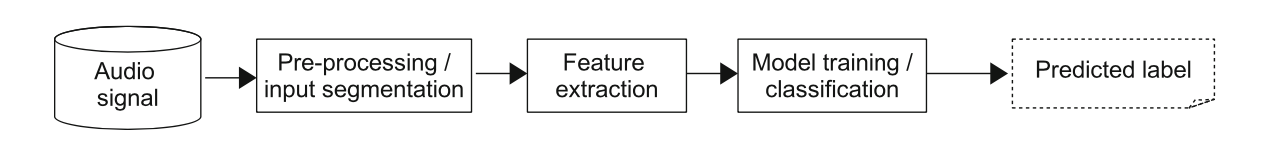

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.






**Audio => Feature Selection => Outlier Detection => Normalisation => Features**

We decide to go with the following transformation stage because of it has the essential steps to perform EDA and easy to follow up.  

**Audio**
*   Unzip 2500 audios from 5 MLENDS zip files


**Feature Selection**

*   Audio files are complex data types. Specifically they are discrete signals or time series, consisting of values on a 1D temporal grid. These values are known as samples themselves, which might be a bit confusing, as we have used this term to refer to the items in our dataset. The sampling frequency is the rate at which samples in an audio file are produced

*   Features: 

1.   Basic Features: power, pitch_mean, pitch_std, voiced_fr
2.   Additional Features based on the concepts of Cepstral Features, Time Domain Descriptors, Spectral Descriptors in Acoustic Featuresand Modelling (Eyben, 2016): 
- MFFC: Most widely used audio feature extraction technique.Produce a compact representation of an audio signal
-Zero crossing rate: A weighted measure of the number of times the signal changes sign in a frame
-Spectral centroid: A measure used in digital signal processing to characterize a spectrum. It indicates where the center of mass of the spectrum is located
-Spectral_rolloff: Compute roll-off frequency.
 




**Outlier Detection**
*  2% of the data are outliers

**Normalization**
*  We used zscore method to normalize data before the splitting process





# 5 Modelling

Considering we are working with a **classification** problem along with a **categorical inputs**, we decide to go with these following models: Naive Bayes, linear discriminant analysis, Stochastic Gradient Descent, KNeighbors, Decission trees, Random Forest, RandomForestClassifier and Support Vector Machine


# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

**1) Train and validate models:**

We split the data into training data (used to fit the model), validation data (model fit evaluation), and test data (model fit evaluation) with the ratio of 80:10:10


**2) Model Evaluation and Selection**

There is no best way to evaluate or select a model. 

Applying Data Mining model evaluation and selection method for Classification Models (J. Han, M. Kamber, J. Pei ,2012), we decide to use the following methods:
- Cross validation for accuracy check and find the best hyparameters for each model(GridSearchCV)
- ROC Curve: The larger the area under the curve the better 
- Cost–Benefit Analysis: Cost associated with a false negative is far greater than those of a false positive.  The benefits associated with a true positive decision may be different than those of a true negative. Better model satisfies the criteria of having both high benefit and low cost among other models


# 7 Dataset

- First, we need to unzip to obtain and then merge the 2500 audio files from MLEndLS_1.zip, MLEndLS_2.zip, MLEndLS_3.zip, MLEndLS_4.zip, and MLEndLS_5.zip along with MLENDS.csv
- Thanks to our peers for discover 2 empty files, we manually remove "0033" and "2206" from Google Drive Folder where we unzipped our files. We also remove the 2 corresponding datapoints in MLENDS.csv
- Our dataset should have 2498 files along the following  field names: file_id,area,spot,in_out,Participant


# 8 Results

# Environment Setup


In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import sklearn


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#normalize data 
from scipy.stats import zscore


#Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE



from sklearn.model_selection import cross_val_score

#Hyperparameter and grid search
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data/MLEndLS'
os.listdir(path)


Mounted at /content/drive


['MLEndLS_1.zip',
 'MLEndLS_2.zip',
 'MLEndLS_3.zip',
 'MLEndLS_4.zip',
 'MLEndLS_5.zip']

Unzip files in google drive

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/MLEnd_London_Sound/sample'

# there are five zip ifle
for num in range(1,6):
  zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_{0}.zip'.format(num)
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [3]:
sample_path = '/content/drive/MyDrive/MLEnd_London_Sound/sample/*.wav'
files = glob.glob(sample_path)
len(files)


2498

Load csv and remove the emty datapoints 

In [4]:
MLENDLS_df = pd.read_csv('/content/MLEndLS.csv').set_index('file_id') 
MLENDLS_df = MLENDLS_df.drop(['0033.wav', '2206.wav']) # remove empty audios
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [5]:
# Verify the labels
MLENDLS_df['in_out'].value_counts()

outdoor    1317
indoor     1181
Name: in_out, dtype: int64

# Feature Extraction

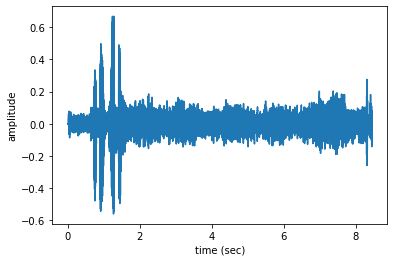

In [6]:
n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [7]:
file_path = files[n]
file_detail = MLENDLS_df.loc[files[n].split('/')[-1]]
print('The file path is : {}'.format(file_path))
print('The file detail is : \n{}'.format(file_detail))

The file path is : /content/drive/MyDrive/MLEnd_London_Sound/sample/1500.wav
The file detail is : 
area            campus
spot            square
in_out         outdoor
Participant       S141
Name: 1500.wav, dtype: object


In [8]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag


def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['in_out'] =='indoor'

    fs = None # if None, fs would be 22050
    try:
        x, fs = librosa.load(file,sr=fs)
        if scale_audio: x = x/np.max(np.abs(x))
        f0, voiced_flag = getPitch(x,fs,winLen=0.02)
          
        power = np.sum(x**2)/len(x)
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
        pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
        voiced_fr = np.mean(voiced_flag)

        #Other features 
        mfccs = librosa.feature.mfcc(x, sr = fs)
        zcr = librosa.feature.zero_crossing_rate(x)
        spec_cent = librosa.feature.spectral_centroid(x, sr = fs)
        rolloff = librosa.feature.spectral_rolloff(x, sr = fs)


        xi = [power,pitch_mean,pitch_std,voiced_fr,np.mean(mfccs), np.mean(zcr), np.mean(spec_cent),np.mean(rolloff)]
        X.append(xi)
        y.append(yi)
    except Exception as e:
      continue

  return np.array(X),np.array(y)

In [9]:
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2498/2498 [1:09:09<00:00,  1.66s/it]


Let's check our data set again after adding more features in

In [10]:
# Load all features in the dataframe
col = ['power', 'pitch_mean', 'pitch_std', 'voiced_fr','mfccs','zcr','spec_cent','rolloff']
features = pd.DataFrame(X, index = np.arange(0,len(X),1), columns = col)
features['in_out'] = y
features


,power,pitch_mean,pitch_std,voiced_fr,mfccs,zcr,spec_cent,rolloff,in_out
0,0.008002,124.366324,37.368706,0.138736,-0.072637,0.016539,940.104621,1736.617338,False
1,0.016052,126.443580,9.911017,0.056782,-8.298968,0.096887,3765.455881,8383.514501,False
2,0.008356,236.657708,48.055864,0.100877,-1.126567,0.045240,1905.874886,3884.948730,False
3,0.003179,0.000000,0.000000,0.000000,-1.772250,0.052278,2255.824113,4853.864327,False
4,0.006184,162.432598,14.204691,0.091057,-1.387670,0.040437,1449.174939,2914.055116,True
...,...,...,...,...,...,...,...,...,...
2493,0.011065,139.834136,8.740223,0.043011,-1.615270,0.044635,1705.914676,3541.004599,True
2494,0.009474,107.086942,8.452984,0.067669,1.026893,0.026284,1359.211444,2522.493318,False
2495,0.006970,335.503284,52.039012,0.117188,-9.620406,0.049088,2383.285508,4457.945023,False
2496,0.014900,156.126519,4.520193,0.028658,0.866153,0.031045,1584.432934,3091.297547,True


In [11]:
# show how many indoor and outdoor sample we have
# Verify the labels
print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

 The number of indoor recordings is  1181
 The number of outdoor recordings is  1317


In [12]:
# Avoid contamination of raw data.
X = np.array(features[col]).copy()
y = np.array(features['in_out']).copy()

# Outlier Detection

In [13]:
# define a outlier detection, which can display the outlier randomly 
# for double checked manually / automatically, and return the inliers.

def outlier_detect(data_X, data_y, n_neighbors, output_data = False):
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.metrics import mean_absolute_error

    # identify outliers in the entire dataset
    lof = LocalOutlierFactor(n_neighbors)
    yhat = lof.fit_predict(data_X)
    
    # extract the outliers(-1)
    outlier = (yhat == -1)
    temp = []
    for i in range(len(outlier)):
        if outlier[i]:
            temp.append(files[i])
    print ('There are {0} outliers which is {1:.2f}% of the entire dataset.'
           .format(len(temp), len(temp)/len(X)*100))        
    print ('Play one of the outliers randomly:')
    ran = np.random.randint(0, len(temp))
    display(ipd.Audio(temp[ran]))
    
    # return the inliers
    X_in = data_X[yhat != -1]
    y_in = data_y[yhat != -1]
    if output_data:
        return (X_in, y_in)

# Return the inliers
X_in, y_in = outlier_detect(X, y, n_neighbors = 50, output_data = True)





There are 69 outliers which is 2.76% of the entire dataset.
Play one of the outliers randomly:


Let's take a look at the statistics summary of our dataset

In [14]:
features.describe()


,power,pitch_mean,pitch_std,voiced_fr,mfccs,zcr,spec_cent,rolloff
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,0.013476,152.615031,21.440425,0.085005,-1.339227,0.041589,1899.549642,3838.224155
std,0.010126,77.823798,21.753945,0.079401,3.541049,0.023466,709.923004,1634.115964
min,0.000433,0.000000,0.000000,0.000000,-20.762302,0.003449,541.631368,823.402980
25%,0.006571,114.553856,7.919292,0.044672,-3.097143,0.028326,1442.906862,2786.566888
50%,0.010588,141.344408,15.342969,0.075938,-0.953007,0.037139,1763.881164,3484.107821
75%,0.017707,199.383685,26.469406,0.102339,1.011941,0.047497,2194.047626,4524.593120
max,0.081043,449.941853,142.306083,0.973684,7.444263,0.316021,7279.768127,15872.605430


In [15]:
print(features.median())

power            0.010588
pitch_mean     141.344408
pitch_std       15.342969
voiced_fr        0.075938
mfccs           -0.953007
zcr              0.037139
spec_cent     1763.881164
rolloff       3484.107821
in_out           0.000000
dtype: float64


Since the number of outliers are not very significant, we decide to keep the inliers only

# Data Normalization with Zscore

In [16]:
#Normalize data with Zscore before splitting
X_zscore = zscore(X_in)


In [17]:
# split the data
X_train, X_rem, y_train, y_rem = train_test_split(X_zscore, y_in, train_size=0.8,random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1943, 8), (243, 8), (1943,), (243,))

# Modelling

In [18]:
#Create a function to print out training and validating accuracy for each classifer 
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    yt_p = model.predict(X_train)
    yv_p = model.predict(X_val)
    #print(confusion_matrix(y_test, preds))
    print('Training accuracy for %s is' % title,np.mean(yt_p == y_train))
    print('Validation accuracy for %s is' % title,np.mean(yv_p == y_val))


In [19]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model_assess(lda, "Linear discriminant analysis")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN #Try out with 
knn = KNeighborsClassifier(n_neighbors=5)
model_assess(knn, "KNN5")

knn = KNeighborsClassifier(n_neighbors=10)
model_assess(knn, "KNN10")

# Decission trees
tree = DecisionTreeClassifier(random_state=0)
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(C=1, random_state=0)
model_assess(svm, "Support Vector Machine")



Training accuracy for Naive Bayes is 0.5630468347915595
Validation accuracy for Naive Bayes is 0.6172839506172839
Training accuracy for Linear discriminant analysis is 0.6438497169325785
Validation accuracy for Linear discriminant analysis is 0.6296296296296297
Training accuracy for Stochastic Gradient Descent is 0.5712815234173958
Validation accuracy for Stochastic Gradient Descent is 0.588477366255144
Training accuracy for KNN5 is 0.7689140504374679
Validation accuracy for KNN5 is 0.6748971193415638
Training accuracy for KNN10 is 0.7354606278950078
Validation accuracy for KNN10 is 0.6954732510288066
Training accuracy for Decission trees is 1.0
Validation accuracy for Decission trees is 0.6337448559670782
Training accuracy for Random Forest is 0.9495625321667525
Validation accuracy for Random Forest is 0.7407407407407407
Training accuracy for Support Vector Machine is 0.7488419969119917
Validation accuracy for Support Vector Machine is 0.7613168724279835


# Cross Validation + Tunning Parameter using GridSearchCV 

In [20]:
from sklearn.model_selection import GridSearchCV
def find_parameters (classifier, parameters, random = False):
    if random:
        cf = classifier(random_state=0)
    else:
        cf = classifier()
    cf_cv = GridSearchCV(cf, parameters)
    cf_cv.fit(X_train, y_train)
    print('Best hyperparameter setting:',cf_cv.best_estimator_)
    print('Average accuracy across folds', cf_cv.best_score_)
    print('Validation accuracy:',cf_cv.score(X_val, y_val))



In [21]:
find_parameters(GaussianNB, {})# var_smoothing is default 

find_parameters(LinearDiscriminantAnalysis,{})

find_parameters(SGDClassifier, {'max_iter': np.arange(1000,10000,1000)})

find_parameters(KNeighborsClassifier, {'n_neighbors': np.arange(1,11,1)})

find_parameters(DecisionTreeClassifier, {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}, random = True)

find_parameters(RandomForestClassifier, {'max_depth': np.arange(1,21,1)}, random = True) #n_estimators(default)

find_parameters(SVC, {'C': [0.1, 1, 10, 100, 1000]},random = True) 




Best hyperparameter setting: GaussianNB()
Average accuracy across folds 0.5620027562080937
Validation accuracy: 0.6172839506172839
Best hyperparameter setting: LinearDiscriminantAnalysis()
Average accuracy across folds 0.6392083852330851
Validation accuracy: 0.6296296296296297
Best hyperparameter setting: SGDClassifier()
Average accuracy across folds 0.6278748045477432
Validation accuracy: 0.6502057613168725
Best hyperparameter setting: KNeighborsClassifier(n_neighbors=7)
Average accuracy across folds 0.665455966925503
Validation accuracy: 0.6995884773662552
Best hyperparameter setting: DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
Average accuracy across folds 0.6778045742453556
Validation accuracy: 0.6584362139917695
Best hyperparameter setting: RandomForestClassifier(max_depth=20, random_state=0)
Average accuracy across folds 0.6958179842578114
Validation accuracy: 0.7530864197530864
Best hyperparameter setting: SVC(C=1, random_state=0)
Average accuracy across folds 0.717

SVC and Random Forest seemingly to have the highest score among train and validation data

# ROC AUC

In [22]:
def auc(model, title="Default"):
    models=model
    models.fit(X_train, y_train)
    pred_prob = models.predict_proba(X_val)
    auc_score = roc_auc_score(y_val, pred_prob[:,1])

    #print(confusion_matrix(y_test, preds))
    print('The ROC AUC score for %s is' % title ,auc_score)


In [23]:
# Naive Bayes
nb = GaussianNB()
auc(nb, "Naive Bayes")

# linear discriminant analysis
lda = LinearDiscriminantAnalysis()
auc(lda, "Linear discriminant analysis")

# Stochastic Gradient Descent probability estimates are not available

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
auc(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier(max_leaf_nodes=9,random_state=0)
auc(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
auc(rforest, "Random Forest")

# Support Vector Machine probability estimates are not available.The ROC curve requires probability estimates (or at least a realistic rank-ordering), which one-class SVM doesn't really try to produce


The ROC AUC score for Naive Bayes is 0.6567457627118645
The ROC AUC score for Linear discriminant analysis is 0.7228474576271186
The ROC AUC score for KNN is 0.7536610169491527
The ROC AUC score for Decission trees is 0.6851186440677965
The ROC AUC score for Random Forest is 0.7972542372881356


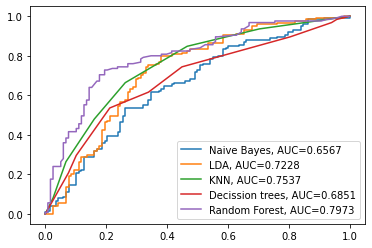

In [24]:
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt


####Ploting the ROC curve
#set up plotting area
plt.figure(0).clf()

#fit Naive Bayes model and plot ROC curve
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred)
auc = round(metrics.roc_auc_score(y_val, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

#fit linear discriminant analysis model and plot ROC curve
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred)
auc = round(metrics.roc_auc_score(y_val, y_pred), 4)
plt.plot(fpr,tpr,label="LDA, AUC="+str(auc))


#fit KNN model and plot ROC curve
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred)
auc = round(metrics.roc_auc_score(y_val, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit Decission trees model and plot ROC curve
model = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred)
auc = round(metrics.roc_auc_score(y_val, y_pred), 4)
plt.plot(fpr,tpr,label="Decission trees, AUC="+str(auc))


#fit Random Forest and plot ROC curve
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred)
auc = round(metrics.roc_auc_score(y_val, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()


Unfortunately, Stochastic Gradient Descent and Support Vector Machine don't support probability estimation for ROC AUC calculation.

Based on the ROC graph, we can see Random Forest and KNN has the largest area under the curve

# Cost–Benefit Comparision

In [25]:
from sklearn.metrics import confusion_matrix
#create a function to return false negative or true positive
def cost_benefit(model, title = "Default"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val,y_pred)
    print(cm)
    print(title)
    print("Cost(False Negative):", cm[1][0]-cm[0][1])
    print("Benefit(True Positive):",cm[0][0]-cm[1][1])
    print("_")




In [26]:
# Naive Bayes
nb = GaussianNB()
cost_benefit(nb, "Naive Bayes")

# linear discriminant analysis
lda = LinearDiscriminantAnalysis()
cost_benefit(lda, "Linear discriminant analysis")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000)
cost_benefit(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
cost_benefit(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
cost_benefit(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
cost_benefit(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(C=1, random_state=0)
cost_benefit(svm, "Support Vector Machine")

[[54 64]
 [29 96]]
Naive Bayes
Cost(False Negative): -35
Benefit(True Positive): -42
_
[[91 27]
 [63 62]]
Linear discriminant analysis
Cost(False Negative): 36
Benefit(True Positive): 29
_
[[71 47]
 [56 69]]
Stochastic Gradient Descent
Cost(False Negative): 9
Benefit(True Positive): 2
_
[[87 31]
 [42 83]]
KNN
Cost(False Negative): 11
Benefit(True Positive): 4
_
[[93 25]
 [58 67]]
Decission trees
Cost(False Negative): 33
Benefit(True Positive): 26
_
[[97 21]
 [39 86]]
Random Forest
Cost(False Negative): 18
Benefit(True Positive): 11
_
[[101  17]
 [ 41  84]]
Support Vector Machine
Cost(False Negative): 24
Benefit(True Positive): 17
_


The higher the benefits the larger the cost. Both Random Forest and SVM seemingly have smallest cost comparing to other models. 

We decide to pick **Random Forest** as the best performance model

# Testing

In [27]:
etc= RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
etc.fit (X_train, y_train)
yv_etc = etc.predict(X_test)
print('Training accuracy of {0} is: {1:.3f}'.format(etc, etc.score(X_train, y_train)))
print('Test accuracy of {0} with  data is: {1:.3f}'.format(etc, etc.score(X_test, y_test)))

Training accuracy of RandomForestClassifier(max_depth=20, random_state=0) is: 1.000
Test accuracy of RandomForestClassifier(max_depth=20, random_state=0) with  data is: 0.634


In [28]:
report = classification_report(yv_etc, y_test, output_dict=True)
report = pd.DataFrame(report).transpose()
print (report)


              precision    recall  f1-score     support
False          0.694215  0.617647  0.653696  136.000000
True           0.573770  0.654206  0.611354  107.000000
accuracy       0.633745  0.633745  0.633745    0.633745
macro avg      0.633993  0.635926  0.632525  243.000000
weighted avg   0.641180  0.633745  0.635052  243.000000


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

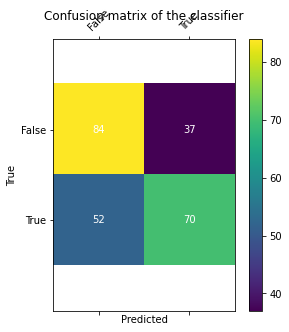

In [30]:
#Plot the confusion matrix
labels = list(set(y_test))  
# print(labels)
cm = confusion_matrix(y_test, yv_etc)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)

for i in range(len(cm)):
  for j in range(len(cm)):
    text = ax.text(j, i, cm[i, j],
                   ha="center", va="center", color="w")

plt.xlabel('Predicted')
plt.ylabel('True')

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

# 9 Conclusions

- The best classifier is RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0) 

- Result: 


1.  Indoor(True) prediction precision score is 0.57
2.  Outdoor (False) prediction precision score is 0.69



- The test accuracy: 0.634


Limitation and future improvement of this experiment: 

- Approvement can still be made to improve the test accuracy score 
- Additional audio features can be added to improve the model
- Feature Selection can be added into the pipeline to improve the model
- Possibility of further applications of audio classification






# Reference


**Theory**

Eyben, F. (2016) Real-time Speech and Music Classification by Large Audio Feature Space Extraction. 

J. Han, M. Kamber, J. Pei (2012) Data Mining: Concepts and Techniques,3rd edition.

**Coding**

https://scikit-learn.org/stable/index.html

https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend/notebook

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/